In [34]:
import pandas as pd
import seaborn as sns
import pdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


In [6]:
df = pd.read_csv("/Users/liu/Desktop/6120/Customer_Data.csv")


# Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0  C10001    40.900749           0.818182      95.40              0.00  \
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                   95.40      0.000000             0.166667  \
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                    0.000000                          0.083333  \
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                0.000000                 0              2        1000.0  \
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [9]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES   
count   8950.000000        8950.000000   8950.000000       8950.000000  \
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
count             8950.000000   8950.000000          8950.000000  \
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
count                 8950.000000                       8950.000000  \
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
count             8950.000000       8950.000000    8950.000000   8949.000000  \
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [10]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [11]:
# Drop irrelevant columns
df = df.drop(['CUST_ID'], axis = 1)
df = df.dropna()  # Drop rows with missing values
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

In [13]:
# Initialize the scaler
scaler = StandardScaler()
# Scale the numerical features
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                      'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                      'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
                      'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   float64
 11  PURCHASES_TRX                     8636 non-null   float64
 12  CREDIT_LIMI

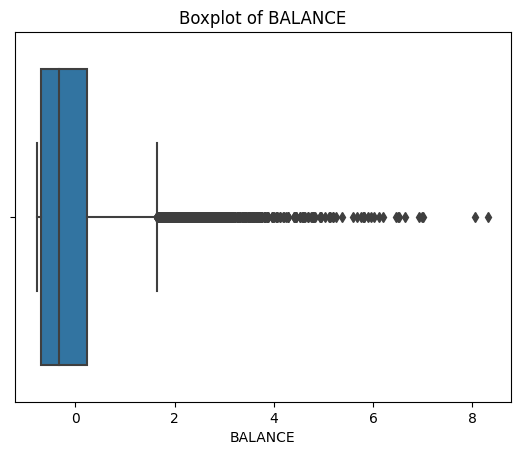

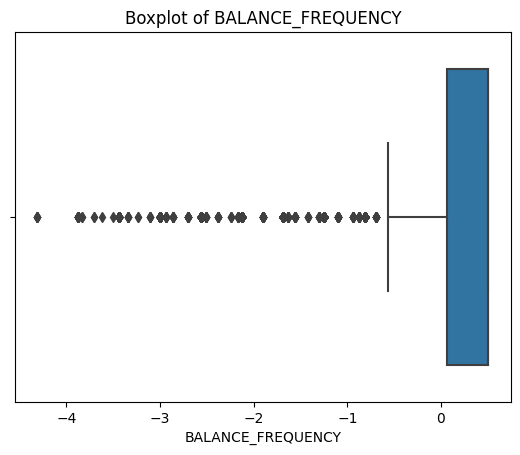

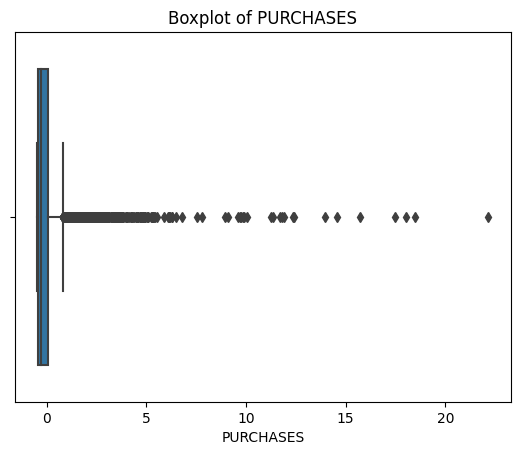

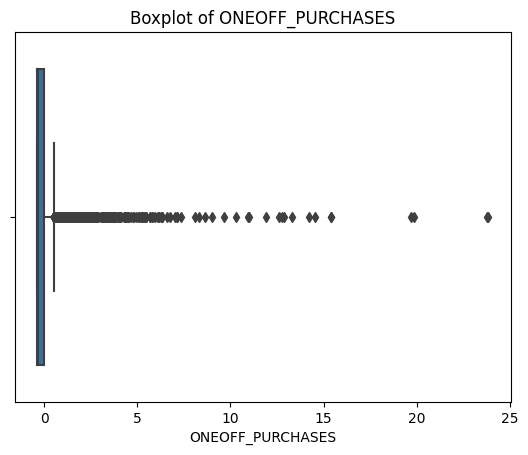

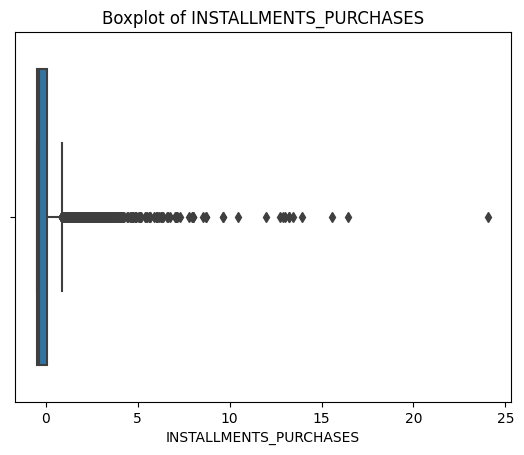

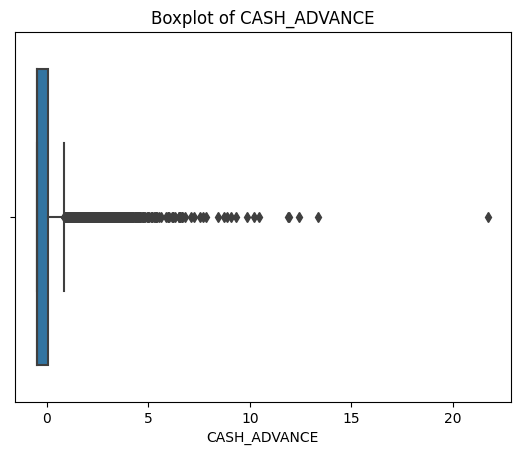

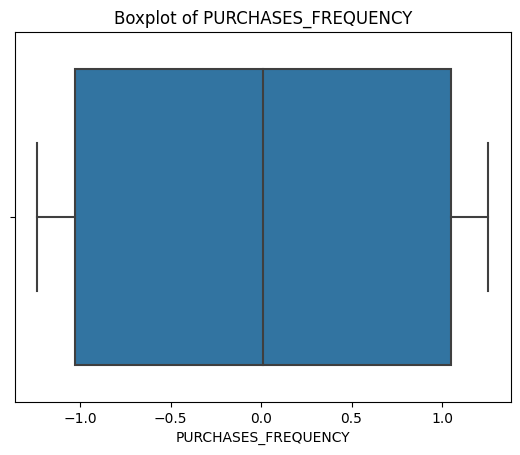

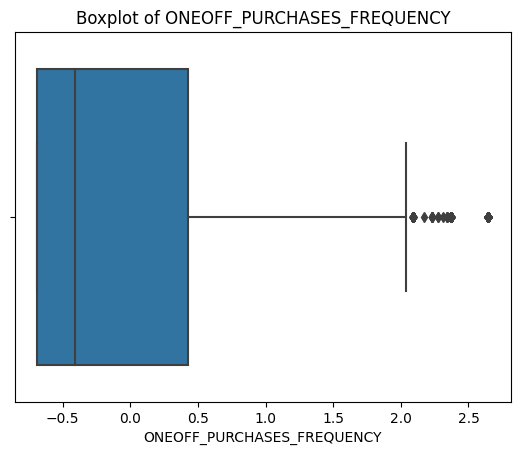

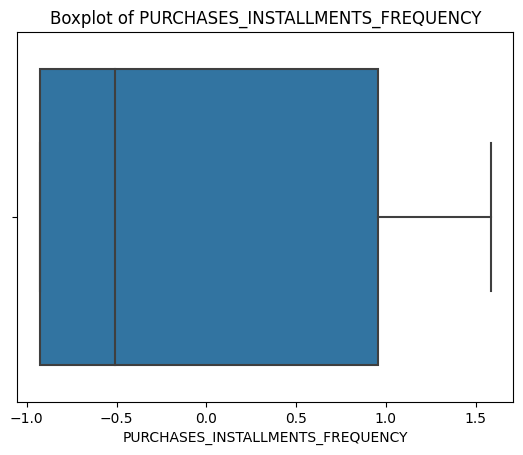

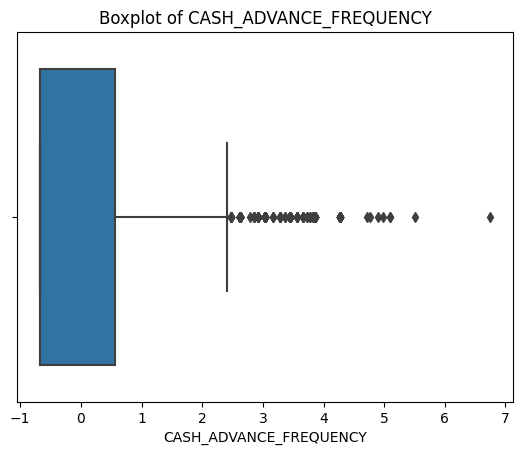

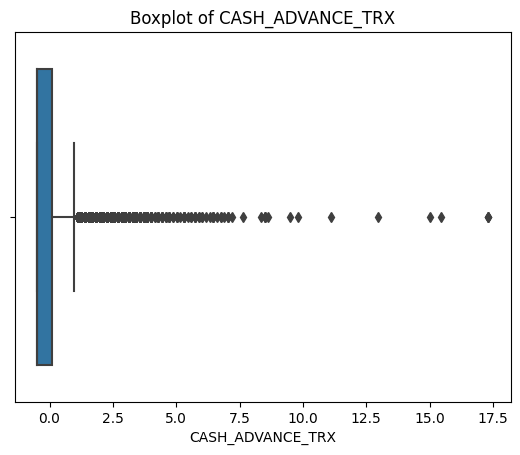

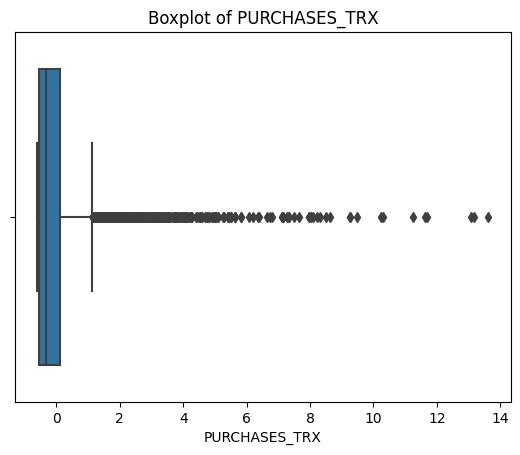

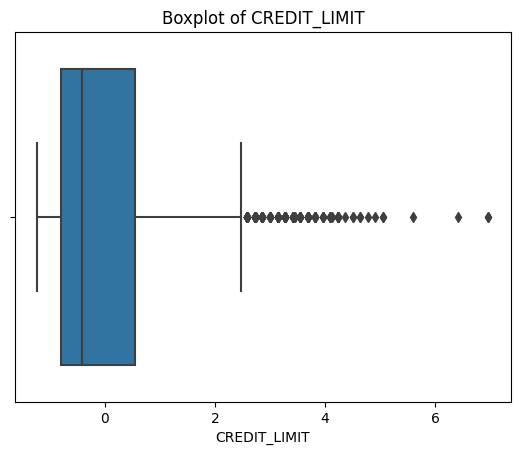

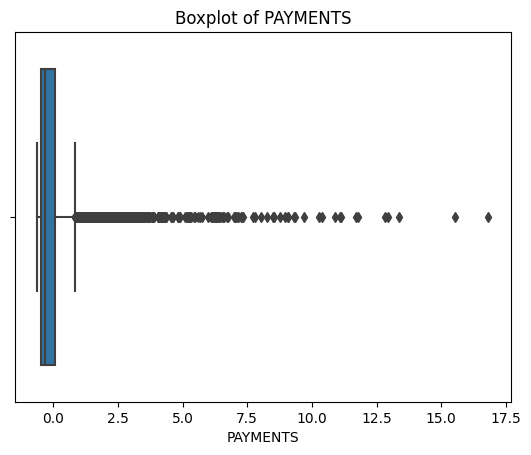

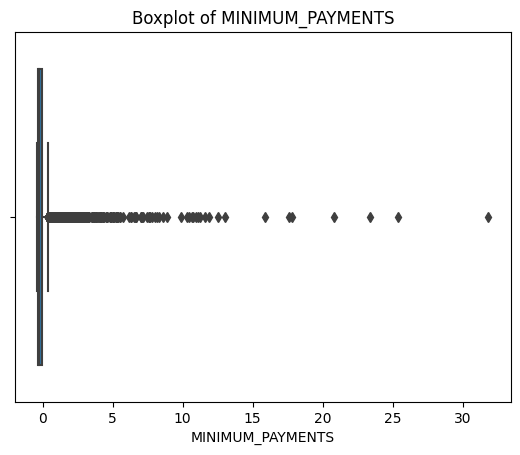

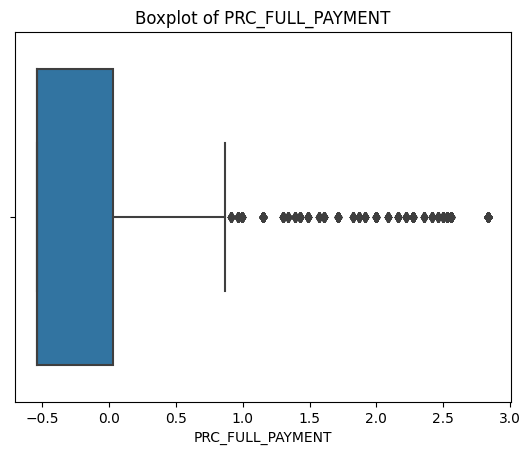

In [15]:
# Create separate boxplots for numerical columns
for column in numerical_features:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

In [16]:
# Perform PCA
pca = PCA(n_components = 0.95)
df_pca = pca.fit_transform(df)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [0.26268124 0.19548536 0.0996314  0.08517654 0.06587774 0.06001595
 0.04833052 0.0406301  0.03549597 0.02957952 0.02271137 0.01703156]
Cumulative explained variance ratio: [0.26268124 0.45816661 0.557798   0.64297454 0.70885228 0.76886823
 0.81719875 0.85782885 0.89332481 0.92290434 0.9456157  0.96264726]


0         1         2         3         4         5         6    
0 -1.654627 -1.127525 -0.694598  0.655212  0.351136  0.103507  0.764216  \
1 -1.180868  2.431526 -0.466514  0.778425 -0.810191  0.571887 -0.637687   
2  0.967934 -0.386569 -0.747003  0.184108  1.149558 -1.936174 -1.741209   
3 -1.571097 -0.729679 -0.879925  0.488811  0.743426 -0.363307  0.620700   
4  0.257673 -0.785851 -0.773992 -1.023665  0.570233  0.912979  0.834450   

         7         8         9         10        11  
0 -0.165313  0.019012 -0.090098 -0.224018 -0.050946  
1 -0.116992  0.788554 -0.749661 -0.875271 -0.596017  
2  0.179038 -0.856915 -0.040642 -0.748839  0.692428  
3 -0.027454  0.609255 -0.088309 -0.472741 -0.117661  
4 -0.153991  0.388014 -0.194154 -0.196169  0.331248

## Explaination of data preparation process.
First, I do df.info to see the information of all variables, there are many missing value in the minimum payments, but as the missing value isn't over 10%. I choose just to drop instead of fillin. When using df.head and descride to see the details, I find the 'CUST_ID' column is useless so I drop this column.

So in the droping step I drop 'CUST_ID' column, rows with missing value and duplicates. Then use df.info to check whether there has any missing value or not. After that I use boxplot to see the outliers. From the boxplot I can find there are some outliers but as they are meaningful so I don't drop the outliers.

For the dimensionality I choose PCA because PCA reduces the number of dimensions while preserving the most critical information, making the data more manageable. And with fewer dimensions, computations become faster, which is especially important in large-scale data. PCA helps simplify and enhance the analysis of high-dimensional data. It achieves this by identifying and retaining the most informative features  while reducing noise and computational complexity.

I create a PCA object that sets the parameter n_components to 0.95. This means that you want PCA to select enough principal components to account for 95% of the cumulative variance. PCA will automatically determine how many principal components are needed to satisfy this criterion.


# Exploratory Data Analysis (EDA)

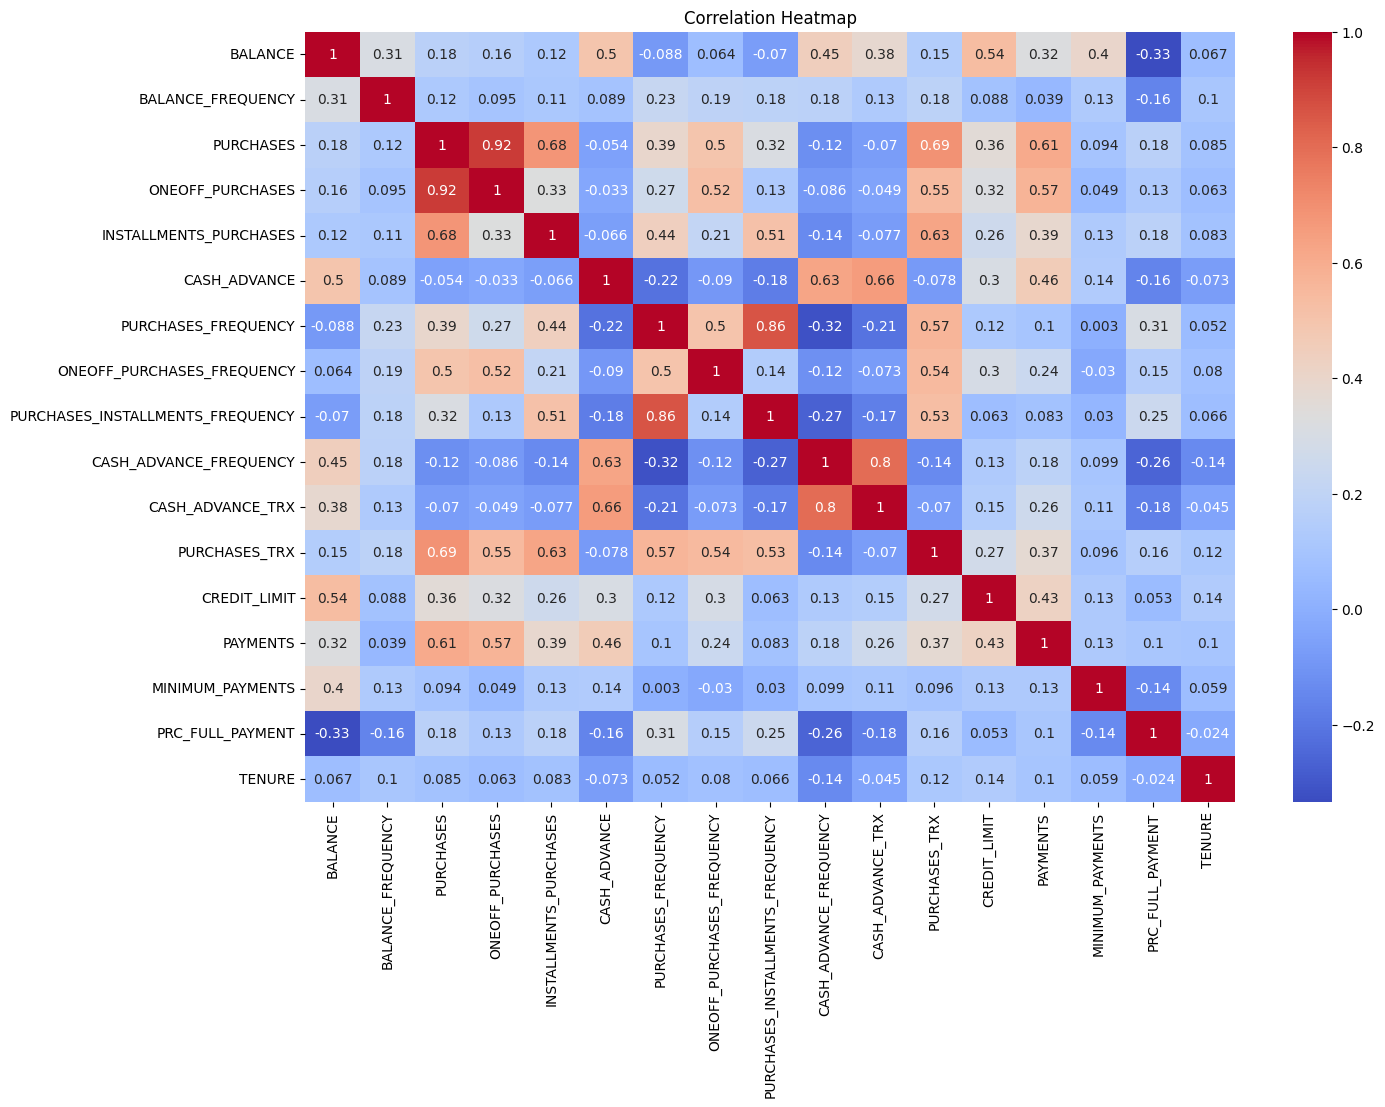

In [17]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

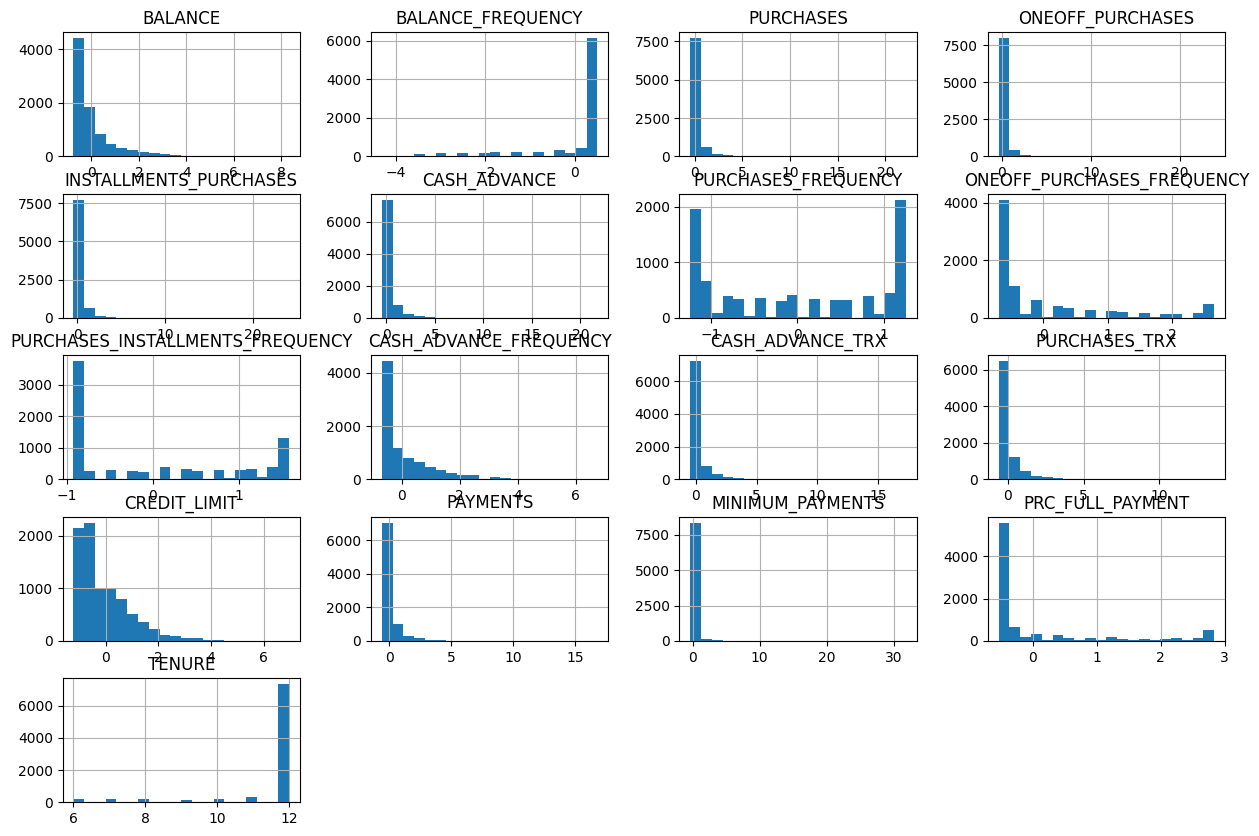

In [18]:
# histogram to visualize features
df.hist(bins=20, figsize=(15, 10))
plt.show()

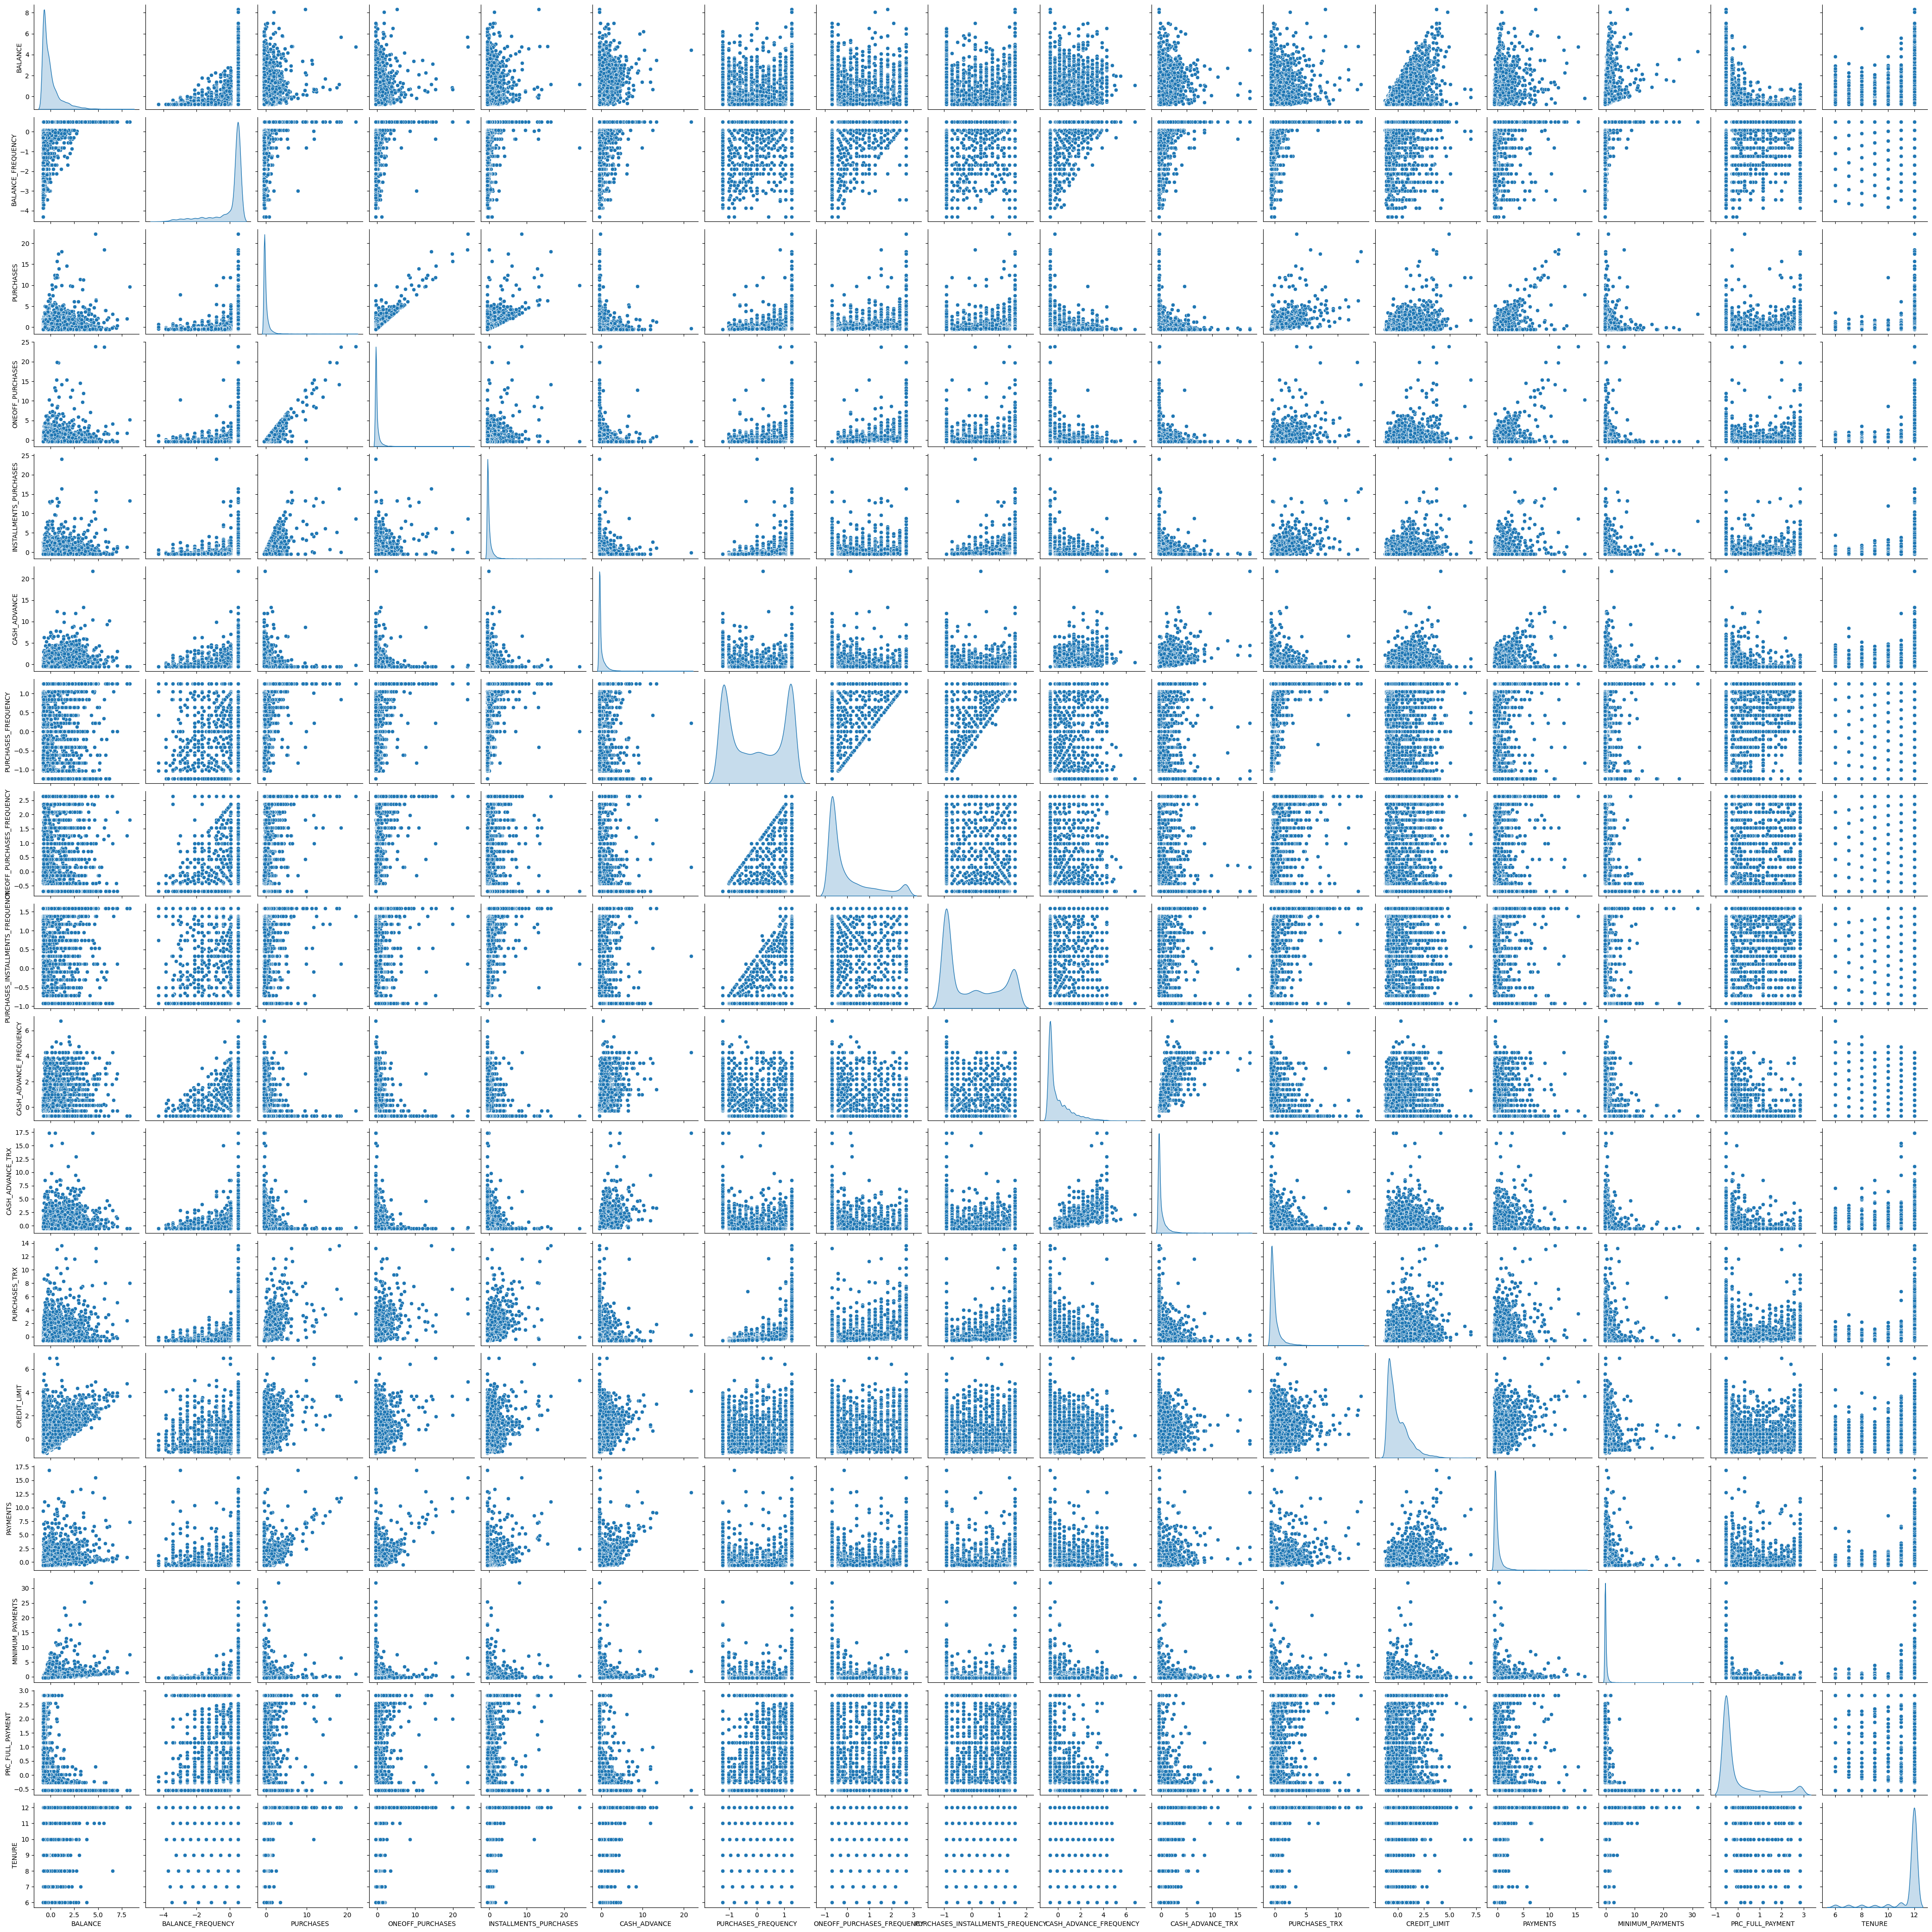

In [19]:
# Pairplot for selected features
selected_features = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
sns.pairplot(selected_features, diag_kind='kde')
plt.show()


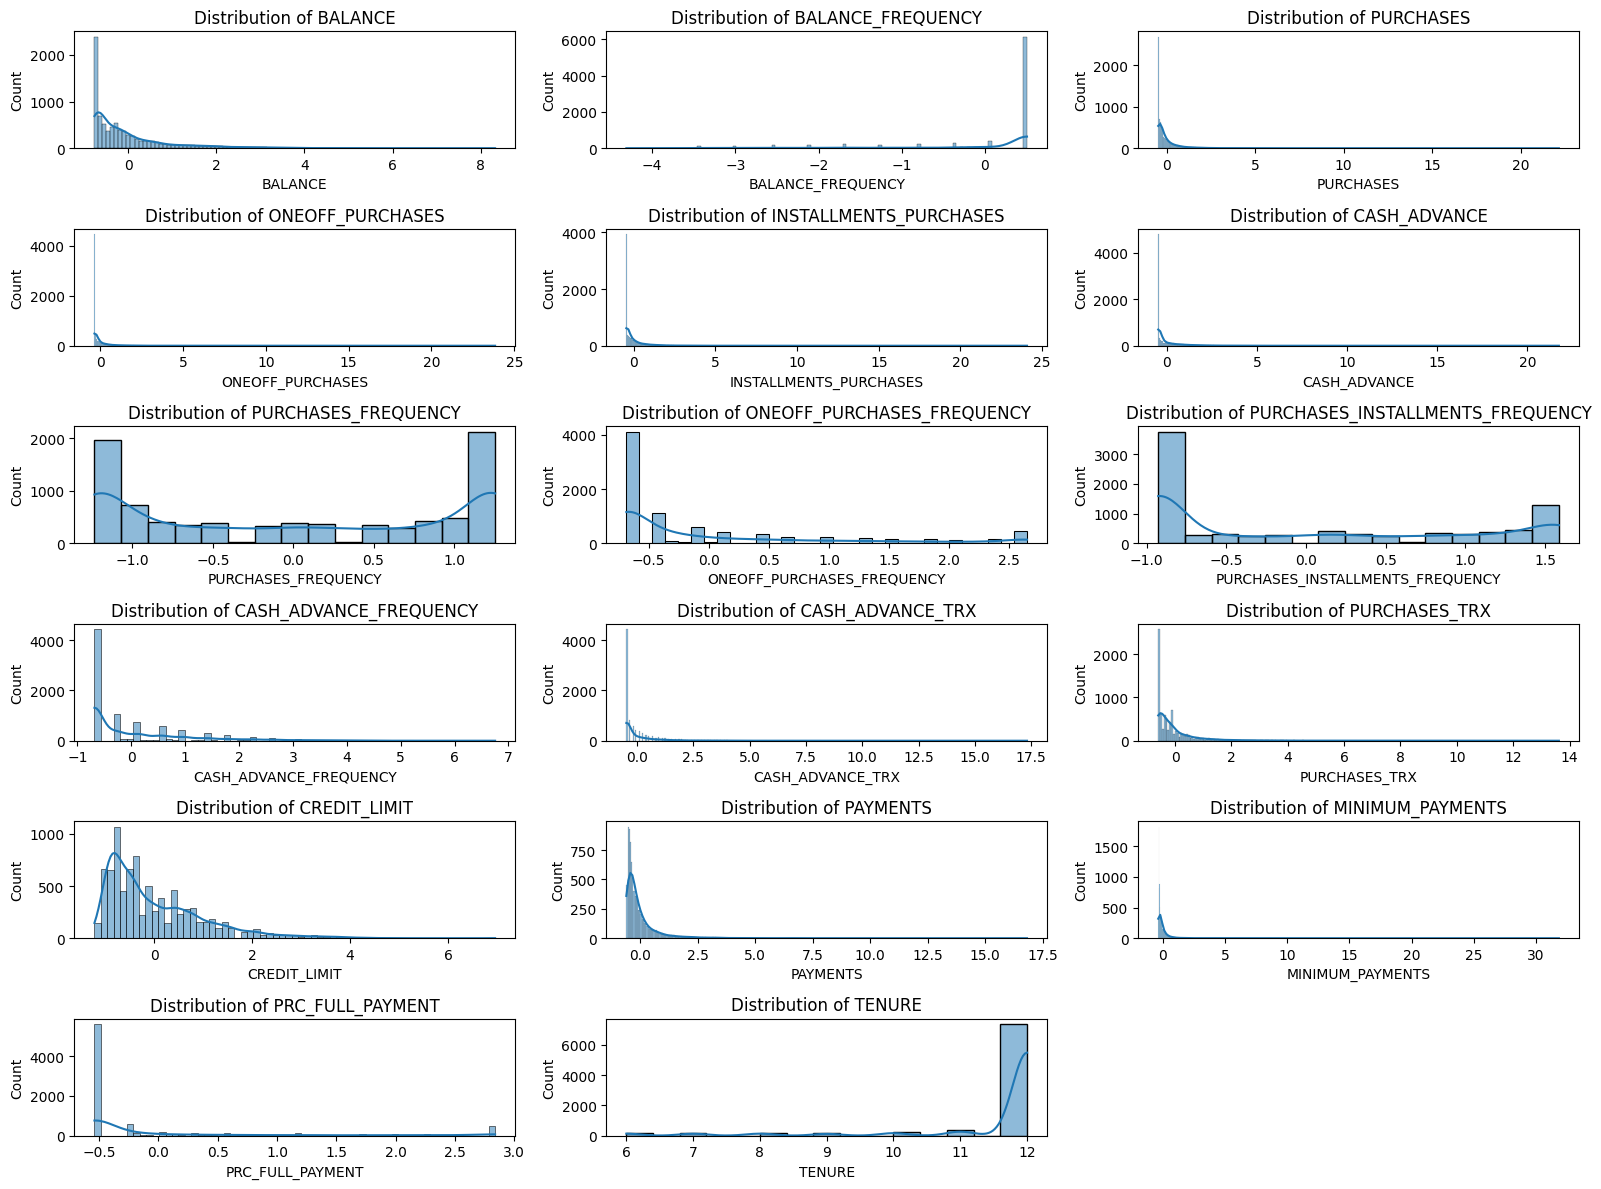

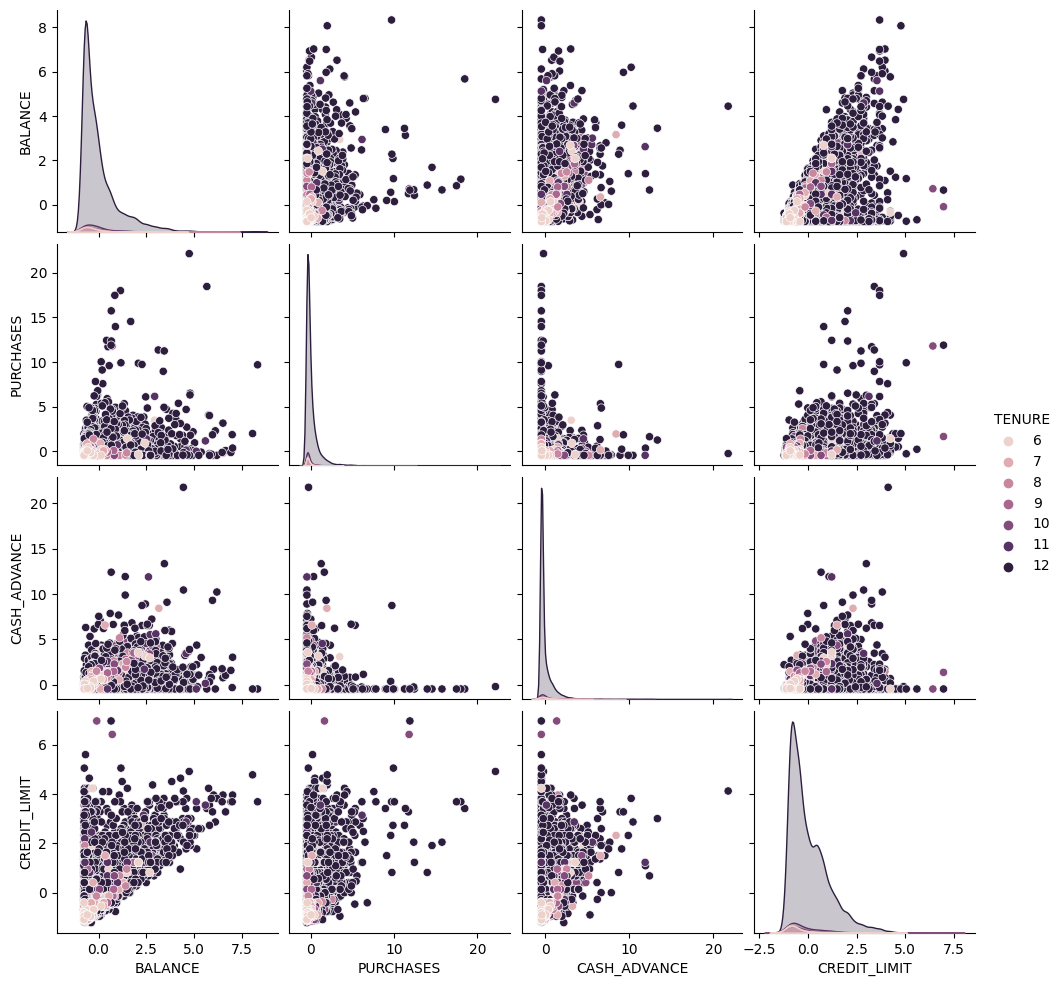

In [20]:
# Distribution of numerical features
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                      'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                      'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
                      'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


# Pairplot for selected features
sns.pairplot(df, vars=['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT'], hue='TENURE')
plt.show()


## Explaination of findings after EDA.
### Correlation Matrix
The correlation matrix helps me identify relationships between numerical features. Strong correlations may suggest patterns in the data. I examine which features are positively or negatively correlated. I find only balance and payment are positively correlated with the credit limit. Cach advance and credit balance are positively correlated with balance. Oneoff_purchase, installment purchase, oneoff_purchase_frequency, purchase_TRX and payment are positively correlated with purchase. Balance, cash_advance_frequency and cash_advance_TRX are positively correlated.
### Distribution of numerical features
The histograms show the distribution of each numerical feature. Understanding the distribution can provide insights into the nature of the data. We can find none of them is normal distribution. Most of them are positively skewed two are negatively skewed.
### Pairplot
The pairplot allows me to visualize relationships between pairs of numerical features. It can reveal potential clusters or patterns in the data. But as there are too much I choose 4 feature to see details. These 4 feature balance, purchases, cash_advance and credit_limit all there 16 scatterplots are all increasing relationships.

# Clustering Algorithms

In [21]:
X = df_pca

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

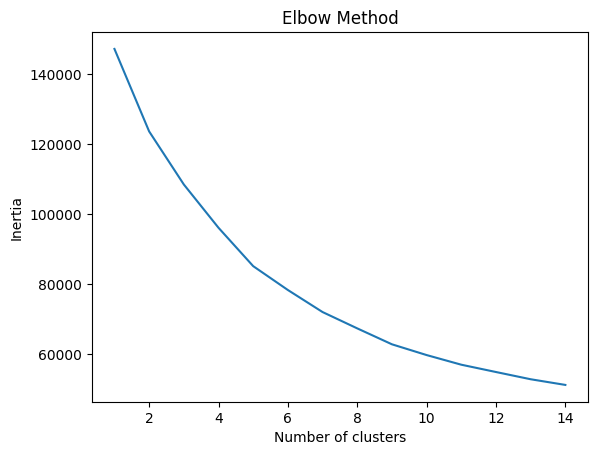

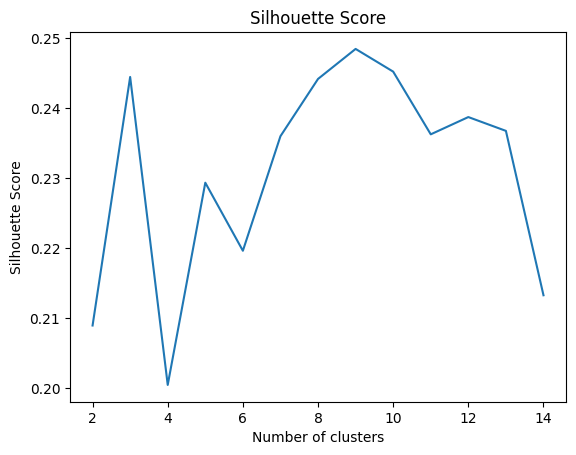

In [26]:
# Elbow Method
inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(X, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.24850926735751983


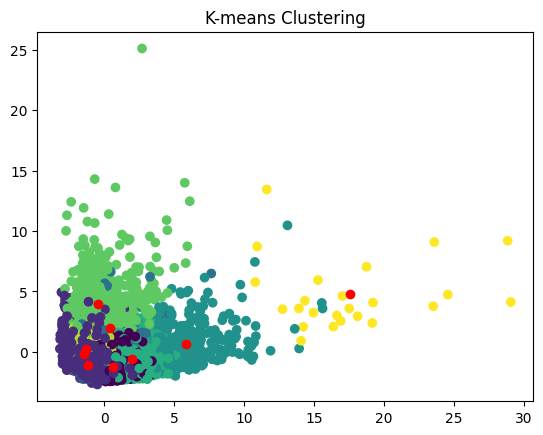

In [28]:
# Applying K-means with 9 clusters (you can choose the optimal number based on the elbow method)
kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
# Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

# Plotting the clusters
plt.scatter(df_pca[0], df_pca[1], c=labels)  # Use column labels
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()

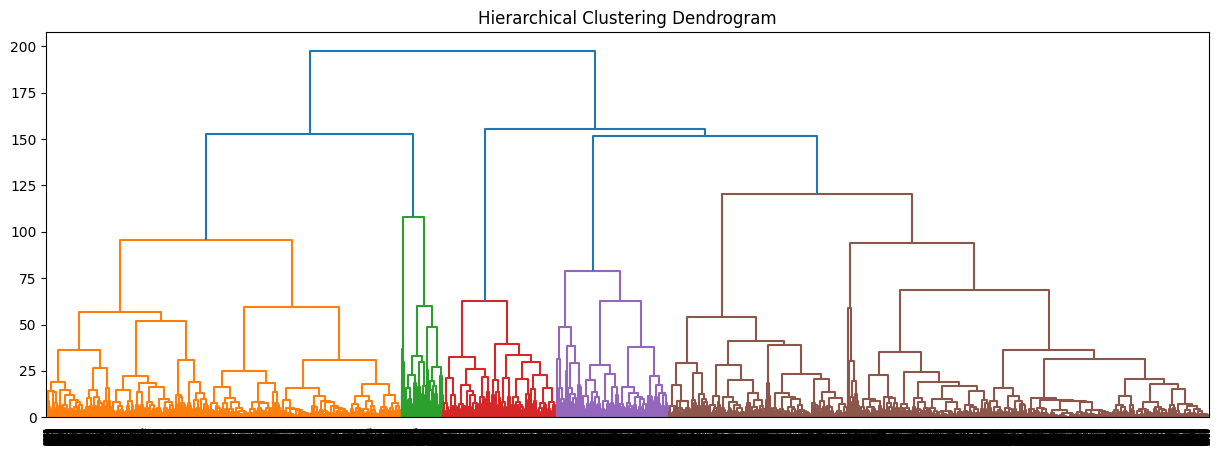

In [39]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [37]:
# Silhouette Score
Hierarchical = AgglomerativeClustering(n_clusters=5)
Hierarchical_labels = Hierarchical.fit_predict(X)

silhouette_score = silhouette_score(X, Hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {silhouette_score}")

Hierarchical Clustering Silhouette Score: 0.19377011612270179


Affinity Propagation Silhouette Score: 0.1414692262477956


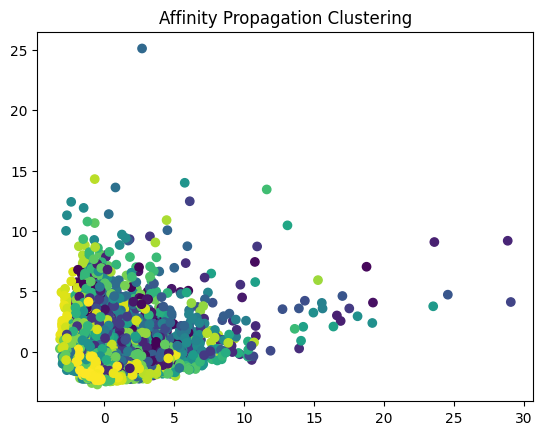

In [35]:
from sklearn.cluster import AffinityPropagation
# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X)

# Silfrom houette Score
af_sil_score = silhouette_score(X, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()

DBSCAN Silhouette Score: -0.49410962771668265


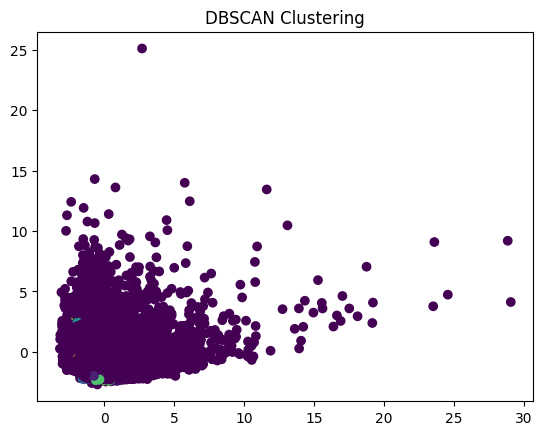

In [36]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

## Discuss each method, and select the most appropriate
First we use Elbow method to find the elbow point as from the first graph the point is not obvious so we can use Silhouette Score graph to find the best number of clustering for the K-mean clustering.
### K-mean
We choose the number of clustering equal to 9, the Silhouette Score of K-mean clustering is 0.24850926735751983. Silhouette Score is close to 0. This indicates that the sample points are located at or very close to the boundary of the cluster, and there may be overlap or blurring. From the figure of K-mean clustering we can also see that there are overlop.
### Hierarchical
From the Hierarchical clustering Dendrogram we can find the dataset is dividied into 5 clusters and the boundary is very clear. Although the Silhouette Score of Hierarchical clustering is 0.19377011612270179. Silhouette Score is close to 0. This indicates that the sample points are located at or very close to the boundary of the cluster, and there may be overlap or blurring. But from the Dendrogram we can see compared to K-mean clustering there seems to be no overlap or blurring.
### Affinity
The Silhouette Score of Affinity clustering is 0.1414692262477956 wihch is close to 0.  This indicates that the sample points are located at or very close to the boundary of the cluster, and there may be overlap or blurring. From the figure of  Affinity clustering we can also see that there are a lot overlop and we can't identify the boundary of different clusters. So I don't choose Affinity.
### DBSCAN
The Silhouette Score of -0.49410962771668265 wich is close to -1. This indicates that the sample points may have been incorrectly assigned to an incorrect cluster. So I don't choose DBSCAN.


Because Graph Visualization for Cluster can help intuitively understand the clustering results of the data. If the clustering graph shows clear, compact clusters, then this is usually considered a good clustering result. But Graphical visualization is not a concrete quantitative metric, so it is difficult to quantitatively assess the quality of clustering. Sometimes, even if the visualization looks good, it may actually be problematic.

Silhouette Score is a numerical metric that provides a quantitative assessment of the quality of clustering. It can help compare the performance of different clustering algorithms or parameter settings. But Silhouette Score is just a metric and it may not capture some specific data patterns. Sometimes it may be affected by the distribution of the data.

So, after conbining the visualization for cluster and the Silhouette Score,the most appropriate method is Hierarchical clustering. 





# Interpreting Clusters

I used PCA for dimensionality reduction instead of other methods where I could manually choose features. However, since PCA selects features automatically, I analyzed potential cluster classifications based on the visual patterns observed in the Exploratory Data Analysis (EDA) plots.

So based on Hierarchical clustering divided the data to 5 clusters based on Hierarchical clustering Dendrogram. And according to the visual patterns observed in EDA the clusters(I think) are:

##### Cluster 1 - "High-Spending Elite Shoppers":
   These customers are characterized by the highest total purchase amounts and credit limits.

   They have a high frequency of both one-off and installment purchases.

   They tend to make frequent full payments, indicating responsible credit card use.

##### Cluster 2 - "Responsible Credit Users":
   These customers exhibit responsible financial behavior with relatively high credit limits.

   They make regular purchases but avoid excessive spending.

   They maintain a high balance frequency and make consistent payments, often in full.

##### Cluster 3 - "Cash Advance Users":
   Customers in this cluster frequently use cash advances, indicating a reliance on credit for cash needs.

   They have a moderate number of purchases but tend to avoid one-off purchases.

   Their credit limits are used for cash advances rather than purchases.
##### Cluster 4 - "Infrequent Shoppers"
   These customers have lower credit limits and lower purchase frequencies.

   They make minimal one-off purchases and installment purchases.

   Payments made are typically above the minimum, but they do not consistently make full payments.
##### Cluster 5 - "Low Credit Limit Users"
   Customers in this cluster have the lowest credit limits.

   They make occasional purchases, but their spending is generally limited.

   Payments are often above the minimum, but not necessarily in full.

#### Most Significant Features Distinguishing Between Clusters:
The most significant features distinguishing between clusters include "PURCHASES," "CREDIT_LIMIT," "ONEOFF_PURCHASES," "INSTALLMENTS_PURCHASES," "PAYMENTS," "BALANCE_FREQUENCY," and "PRC_FULL_PAYMENT."

"PURCHASES" and "CREDIT_LIMIT" are crucial for distinguishing between Cluster 1 ("High-Spending Elite Shoppers") and the others. High values of both features set them apart.

"CASH_ADVANCE" is highly significant for identifying Cluster 3 ("Cash Advance Users").

"BALANCE_FREQUENCY" and "PRC_FULL_PAYMENT" play a role in separating Cluster 2 ("Responsible Credit Users") from others.

"ONEOFF_PURCHASES" and "INSTALLMENTS_PURCHASES" help distinguish between spending patterns, while "PAYMENTS" is essential in assessing payment behavior.


# Actionable Insights

### High-Spending Elite Shoppers (Cluster 1):

Recommendation: Target these customers with exclusive offers, loyalty programs, and premium services to encourage them to continue their high spending habits.
Strategy: Offer rewards for frequent purchases, credit limit increases, and personalized promotions. Provide excellent customer service to maintain their loyalty.

### Responsible Credit Users (Cluster 2):

Recommendation: Focus on enhancing customer relationships and providing financial education to promote responsible credit use.
Strategy: Offer credit limit increases for customers in this cluster who have maintained responsible financial behavior. Provide educational resources on personal finance and credit management.

### Cash Advance Users (Cluster 3):

Recommendation: Encourage these customers to explore alternative financial products for cash needs to reduce reliance on cash advances.
Strategy: Promote personal loans, emergency funds, or other financial products as alternatives to cash advances. Educate customers on the high costs associated with cash advances.

### Infrequent Shoppers (Cluster 4):

Recommendation: Incentivize these customers to make more frequent and diverse purchases using their credit cards.
Strategy: Offer cashback rewards, discounts, or special promotions to encourage more frequent and varied purchases. Send personalized product recommendations.

### Low Credit Limit Users (Cluster 5):

Recommendation: Consider credit limit increases for customers who demonstrate responsible payment behavior to empower them to spend more.
Strategy: Regularly review and adjust credit limits based on customer payment patterns. Encourage responsible credit card use to build trust and qualify for limit increases.

Overall, understanding customer segments and tailoring marketing, services, and incentives to each group's needs can help improve customer satisfaction and engagement. These recommendations can lead to increased customer loyalty and potentially higher revenues. Additionally, continuous monitoring of customer behavior and preferences is essential for adapting strategies over time to meet changing needs.




